In [28]:
import pandas as pd
import numpy as np

## Contexto del trabajo(Escalado de caracteristicas)
#### Teniendo en cuenta las siguientes técnicas de Escalado de características:

- Standardization (0.5 en cada dataset)
- Normalization(0.5 en cada dataset)
- Vector Normalization(0.5 en cada dataset)
- Una técnica no explicada en clase y explicar en qué consiste dicha técnica.(0.5 en cada dataset)

#### Debéis aplicarlas a los siguientes Datasets:

- Alojamiento en Boston (2)
- Diabetes (2)
- Analisis de datos de deporte(2)
- Un dataset que se adapte a vuestro proyecto incial(2)

## Alojamiento en Boston dataset

In [29]:
df = pd.read_csv('/home/alumnadotarde/Descargas/BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Limpieza de los datos

In [30]:
# Verificar valores faltantes
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [31]:
# Borramos los valores nulos y volvemos a hacer una comprobacion
df = df.dropna()

# Verificar valores faltantes
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


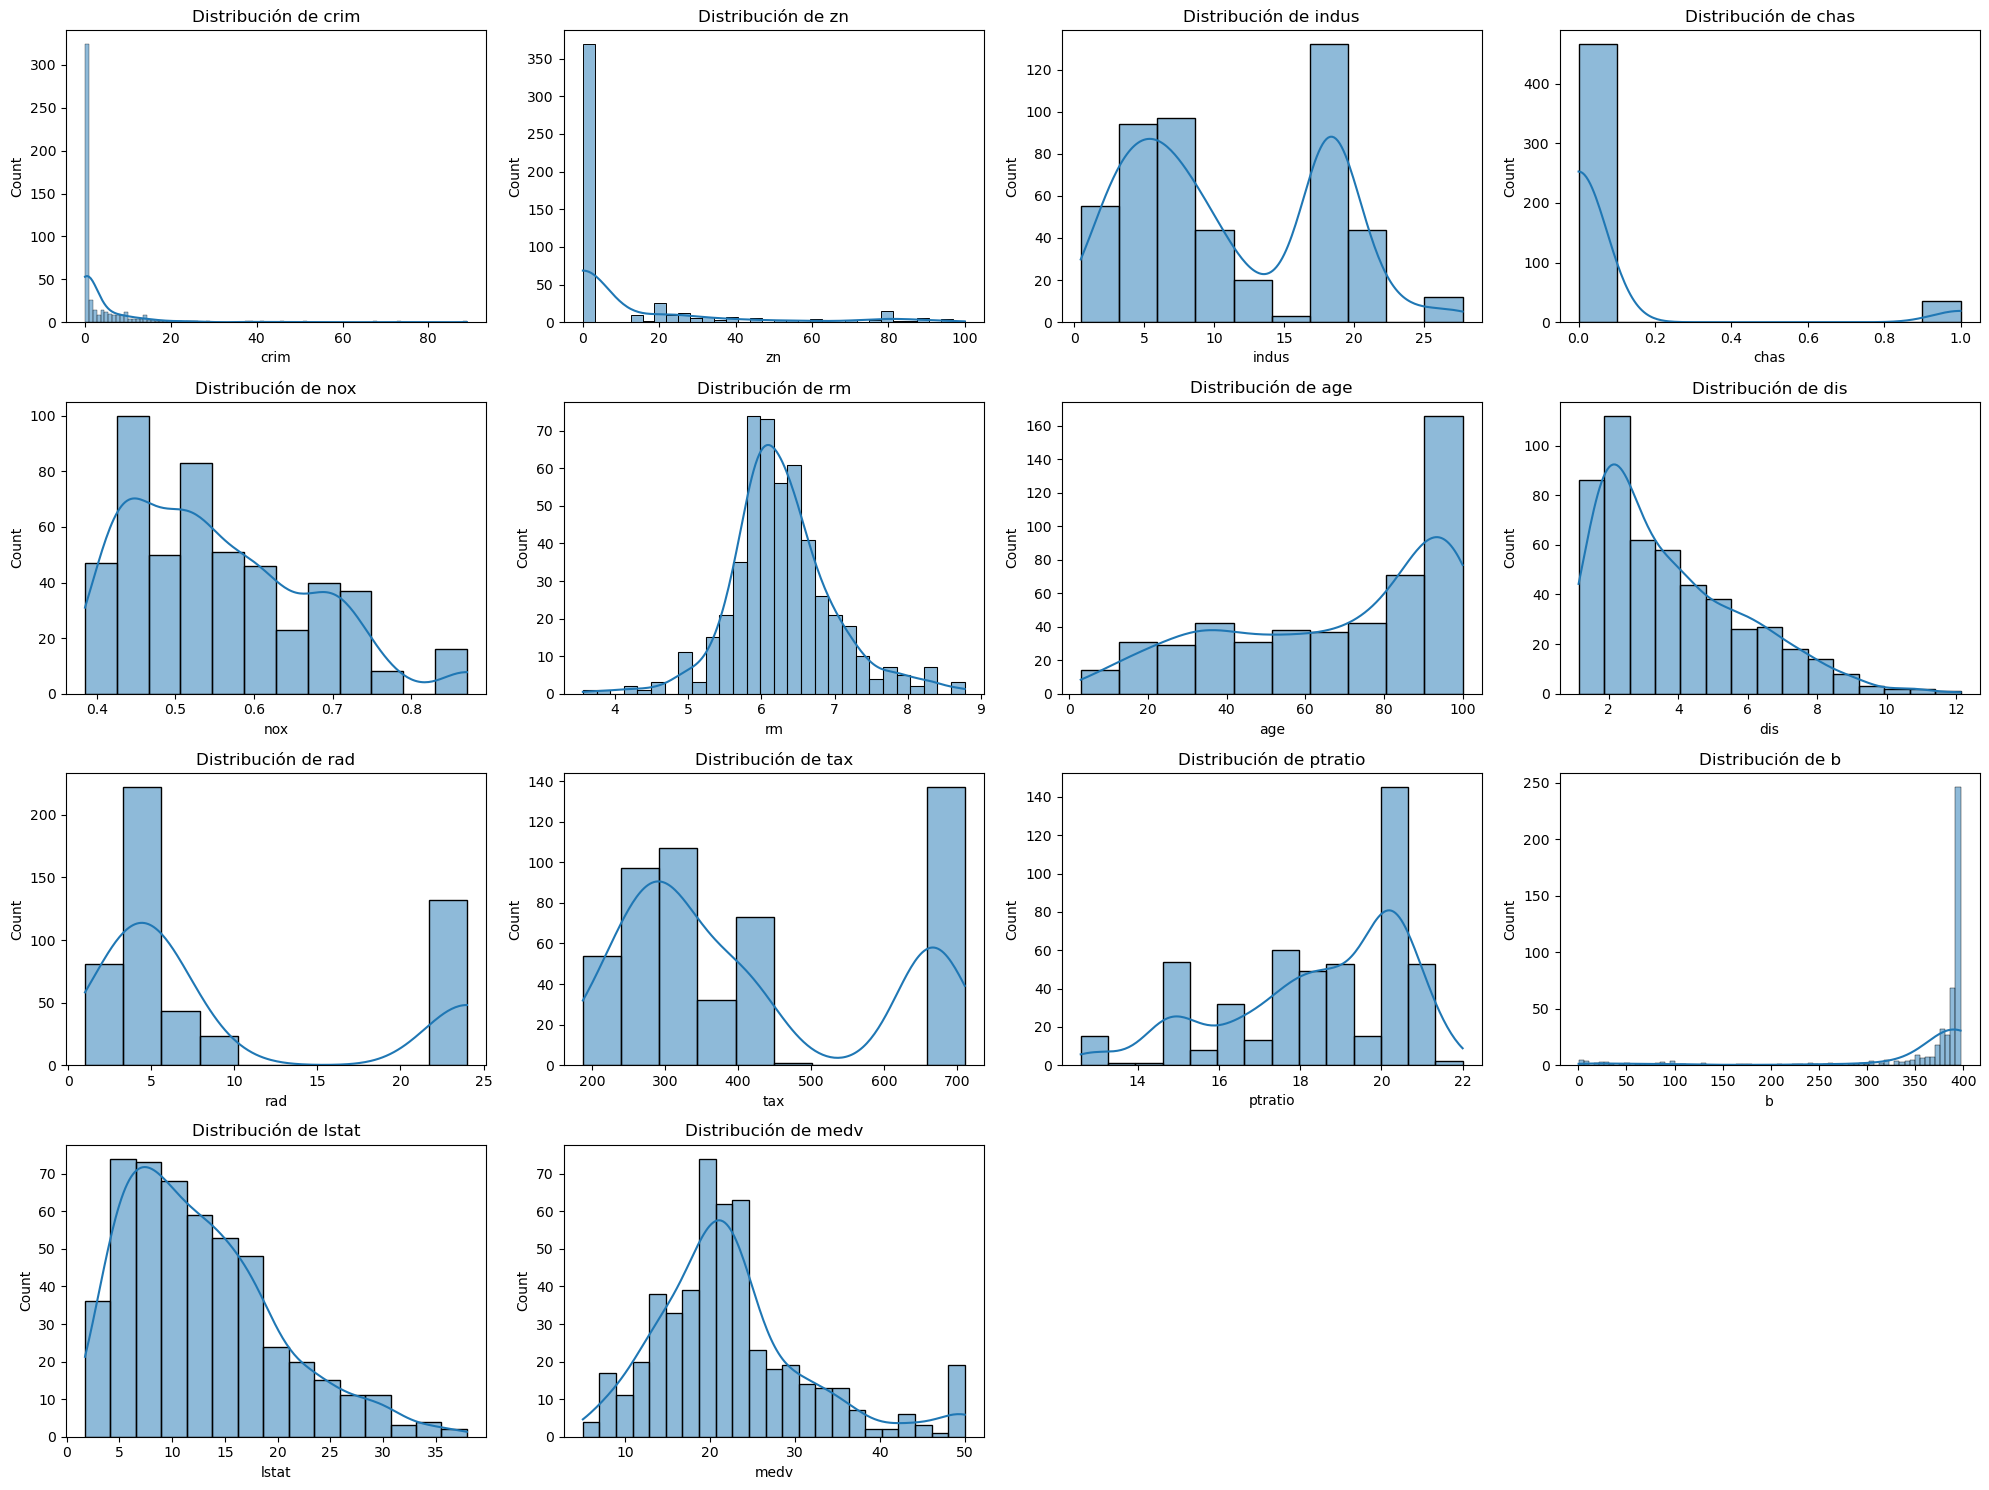

In [32]:
import seaborn as sns

import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 15))

# Crear un gráfico de distribución para cada columna
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

## Metodo 1(Standardization)
### La estandarización transforma las características para que tengan media 0 y desviación estándar 1.

In [33]:
# Calcular la desviación estándar de cada columna
desviaciones = df.std()

# Ordenar de mayor a menor
desviaciones_ordenadas = desviaciones.sort_values(ascending=False)
print(desviaciones_ordenadas)

tax        169.021216
b           91.672055
age         28.212221
zn          23.414214
medv         9.232435
rad          8.735509
crim         8.637688
lstat        7.162746
indus        6.857123
ptratio      2.166327
dis          2.103327
rm           0.705587
chas         0.255166
nox          0.116186
dtype: float64


#### Viendo los valores anteriores, vamos a estandarizar las columnas con una desviacion mayor a 1

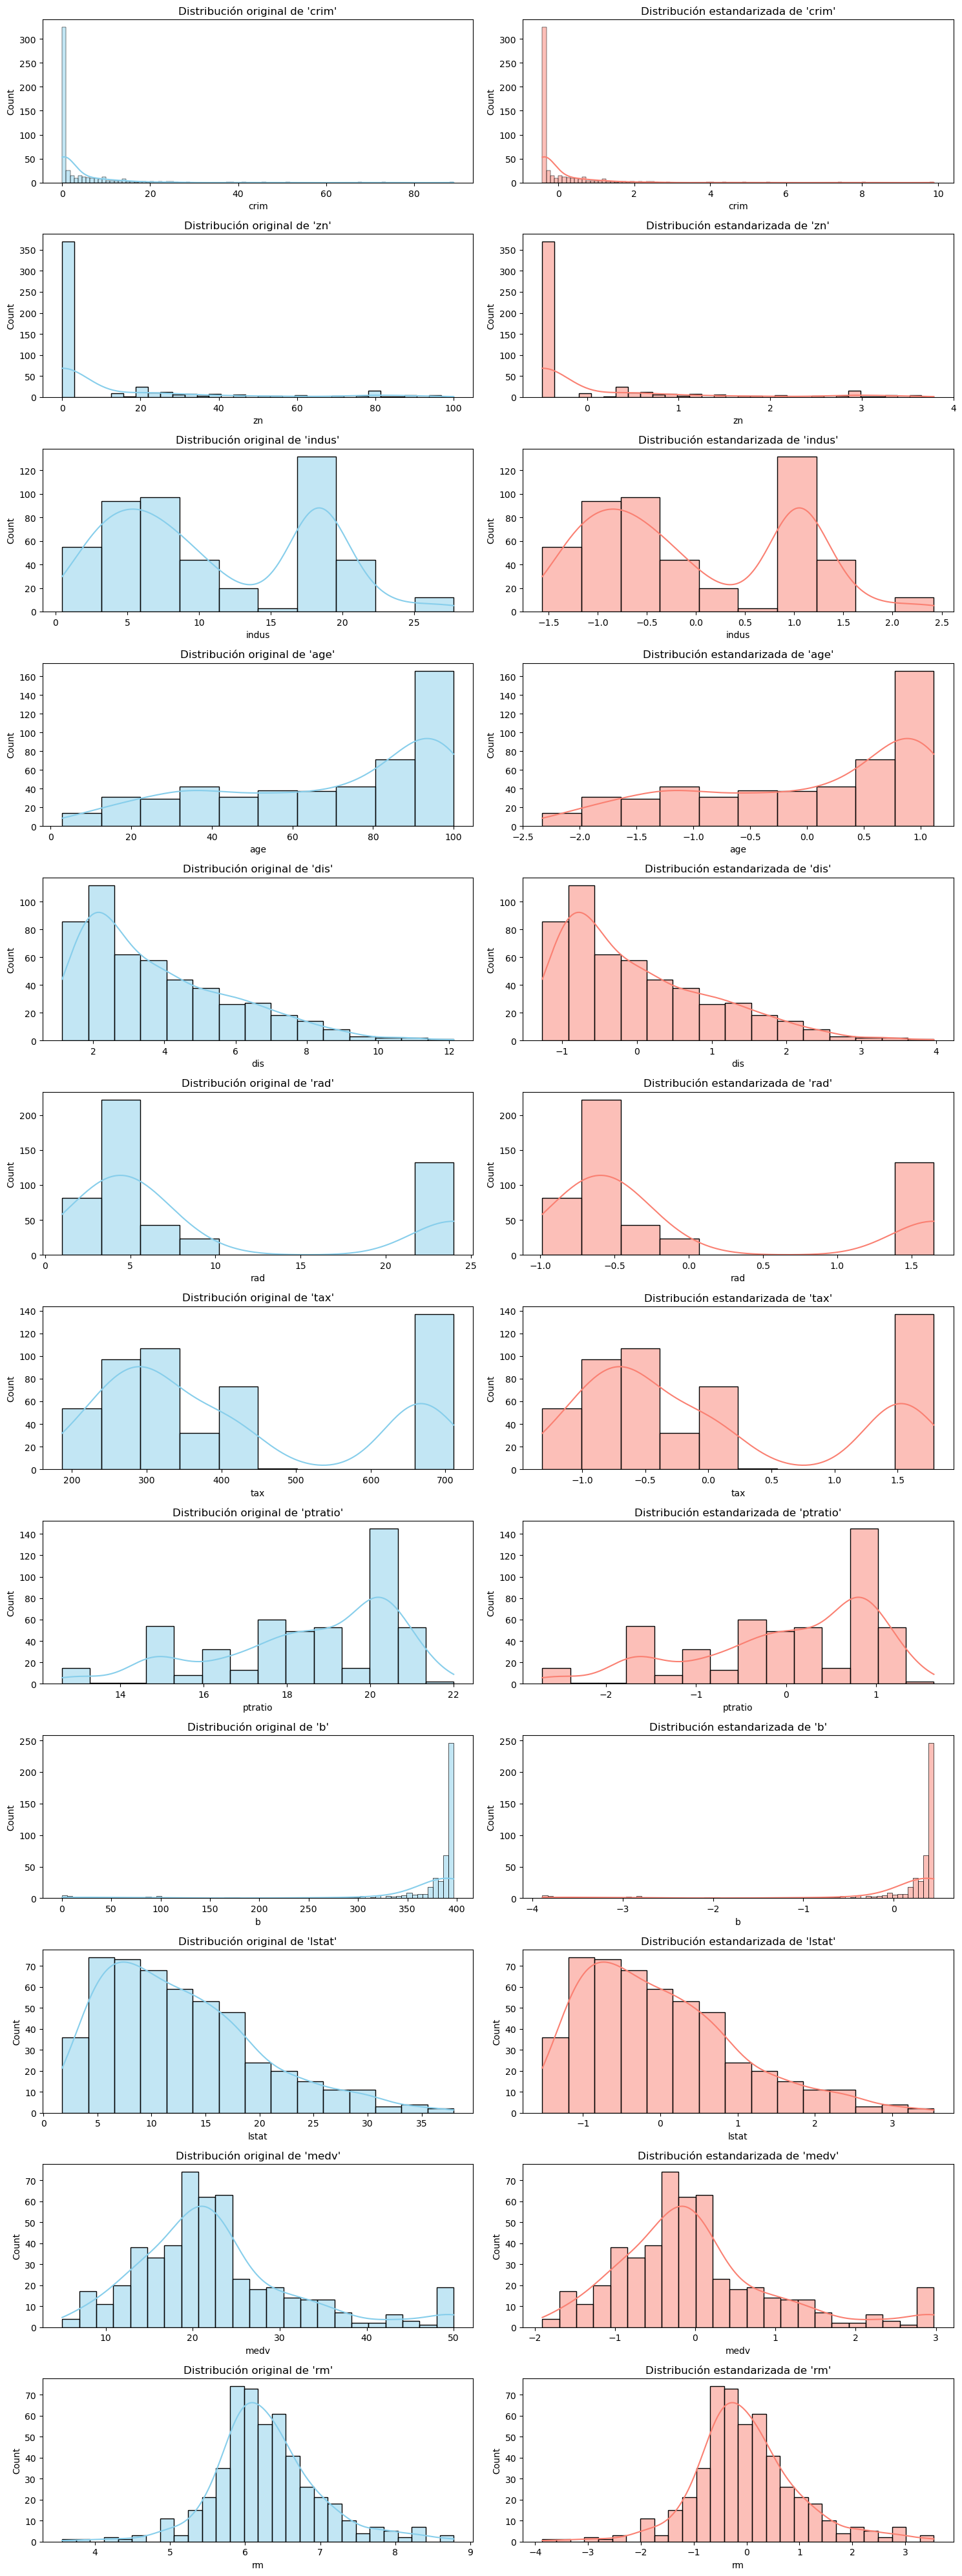

In [34]:
from sklearn.preprocessing import StandardScaler

# Seleccionar features continuas a escalar
features = ['crim', 'zn', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat','medv','rm']

scaler_standard = StandardScaler()
df_standard = df.copy()
df_standard[features] = scaler_standard.fit_transform(df[features])

# Visualización comparativa: antes y después para todas las características
plt.figure(figsize=(15, 40))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 2, 2*i-1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f"Distribución original de '{feature}'")
    
    plt.subplot(len(features), 2, 2*i)
    sns.histplot(df_standard[feature], kde=True, color='salmon')
    plt.title(f"Distribución estandarizada de '{feature}'")

plt.tight_layout()
plt.show()

## Metodo 2 (Normalization)

#### La normalización (o escalado Min-Max) transforma los datos para que todos los valores queden en un rango determinado, normalmente [0,1][0,1]
    - Esta técnica es útil cuando se requiere que todas las características tengan la misma escala, especialmente para algoritmos que se basan en distancias

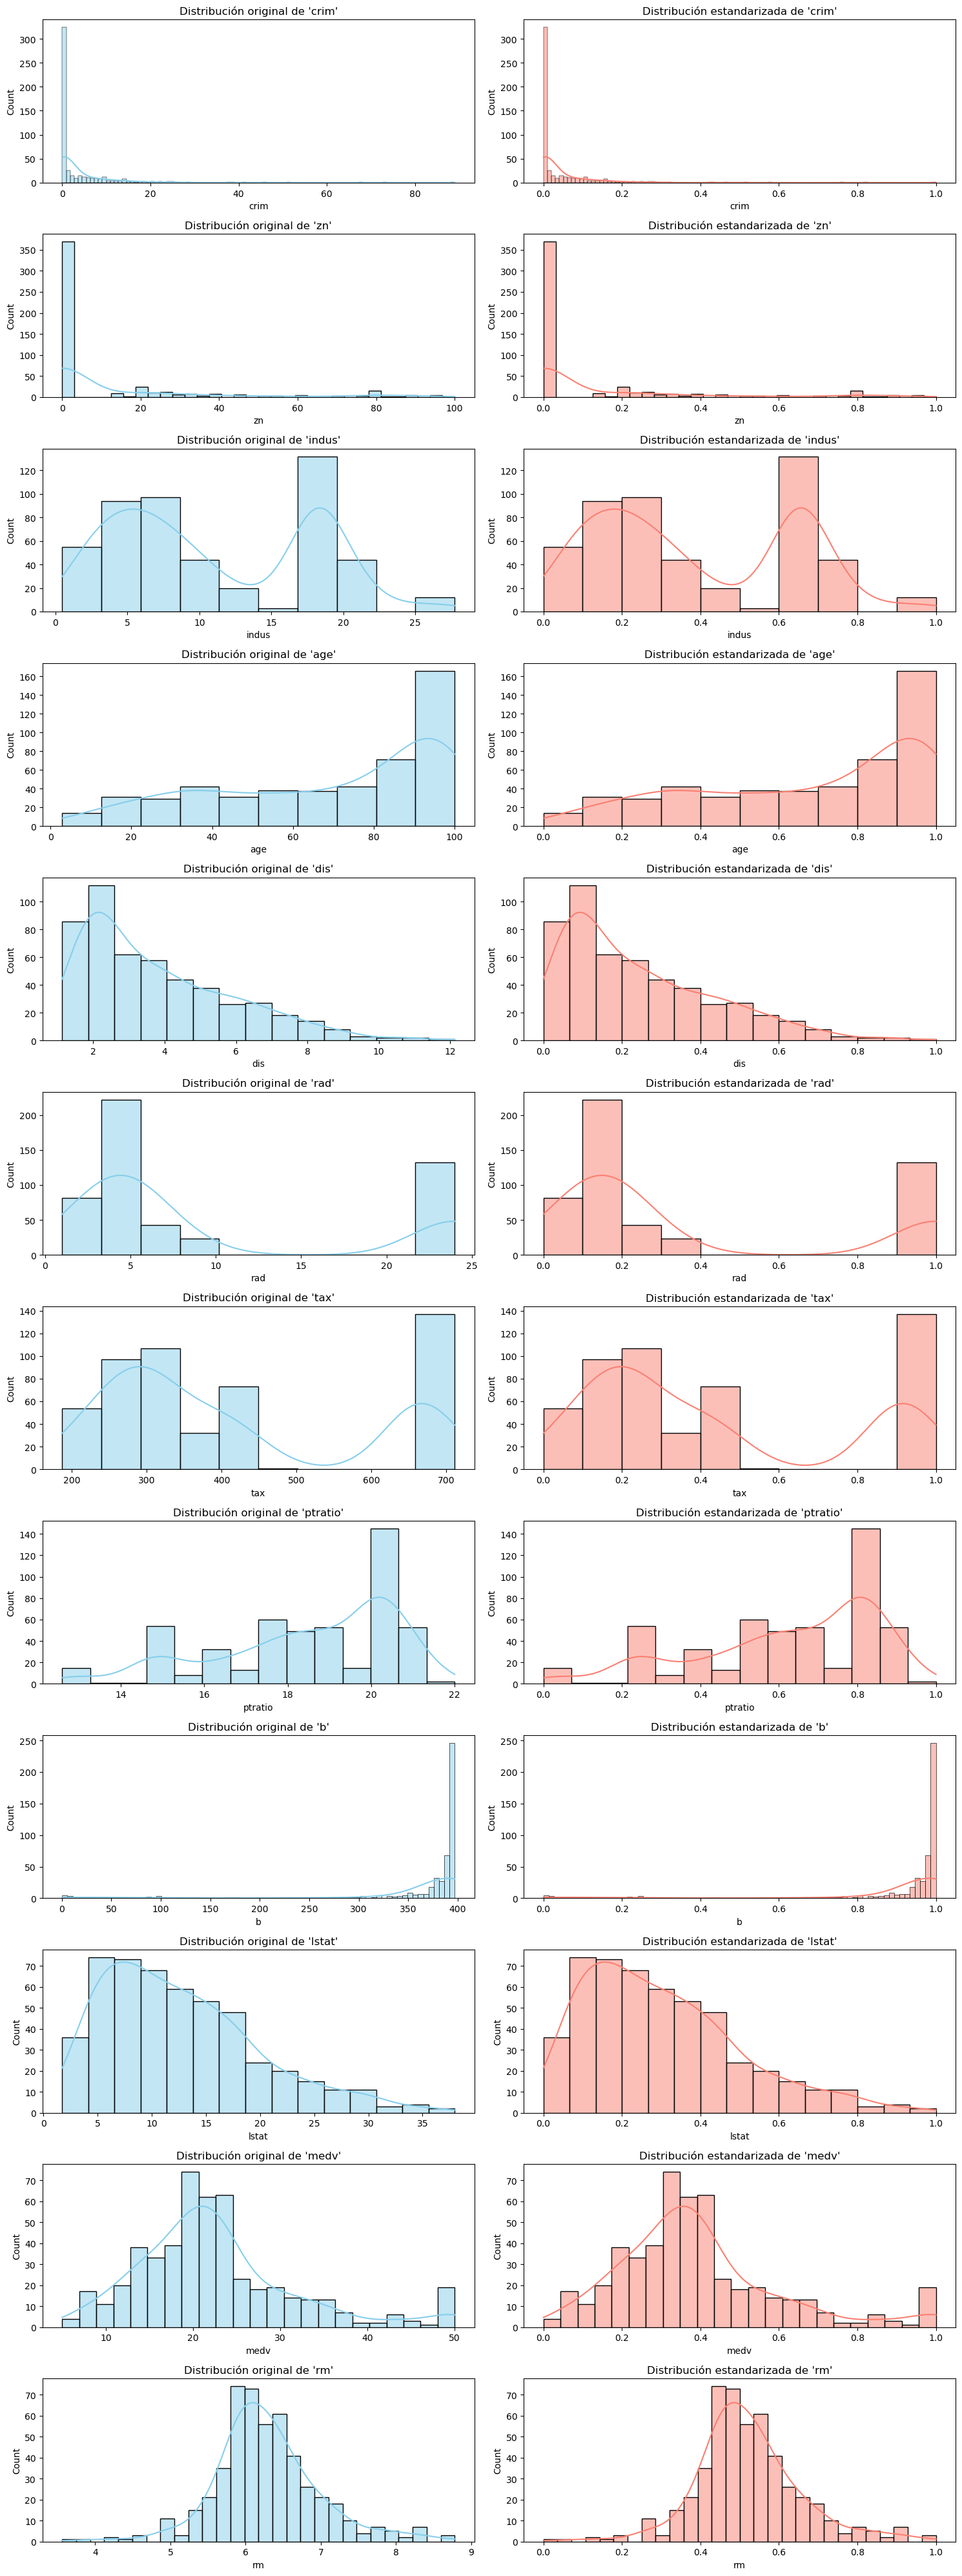

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features] = scaler_minmax.fit_transform(df[features])

# Visualización comparativa: antes y después para todas las características
plt.figure(figsize=(15, 40))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 2, 2*i-1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f"Distribución original de '{feature}'")
    
    plt.subplot(len(features), 2, 2*i)
    sns.histplot(df_minmax[feature], kde=True, color='salmon')
    plt.title(f"Distribución estandarizada de '{feature}'")

plt.tight_layout()
plt.show()

## Metodo 3 (Vector Normalization)

### La normalización vectorial se aplica generalmente a nivel de filas y consiste en transformar cada vector de características de modo que tenga una norma unitaria

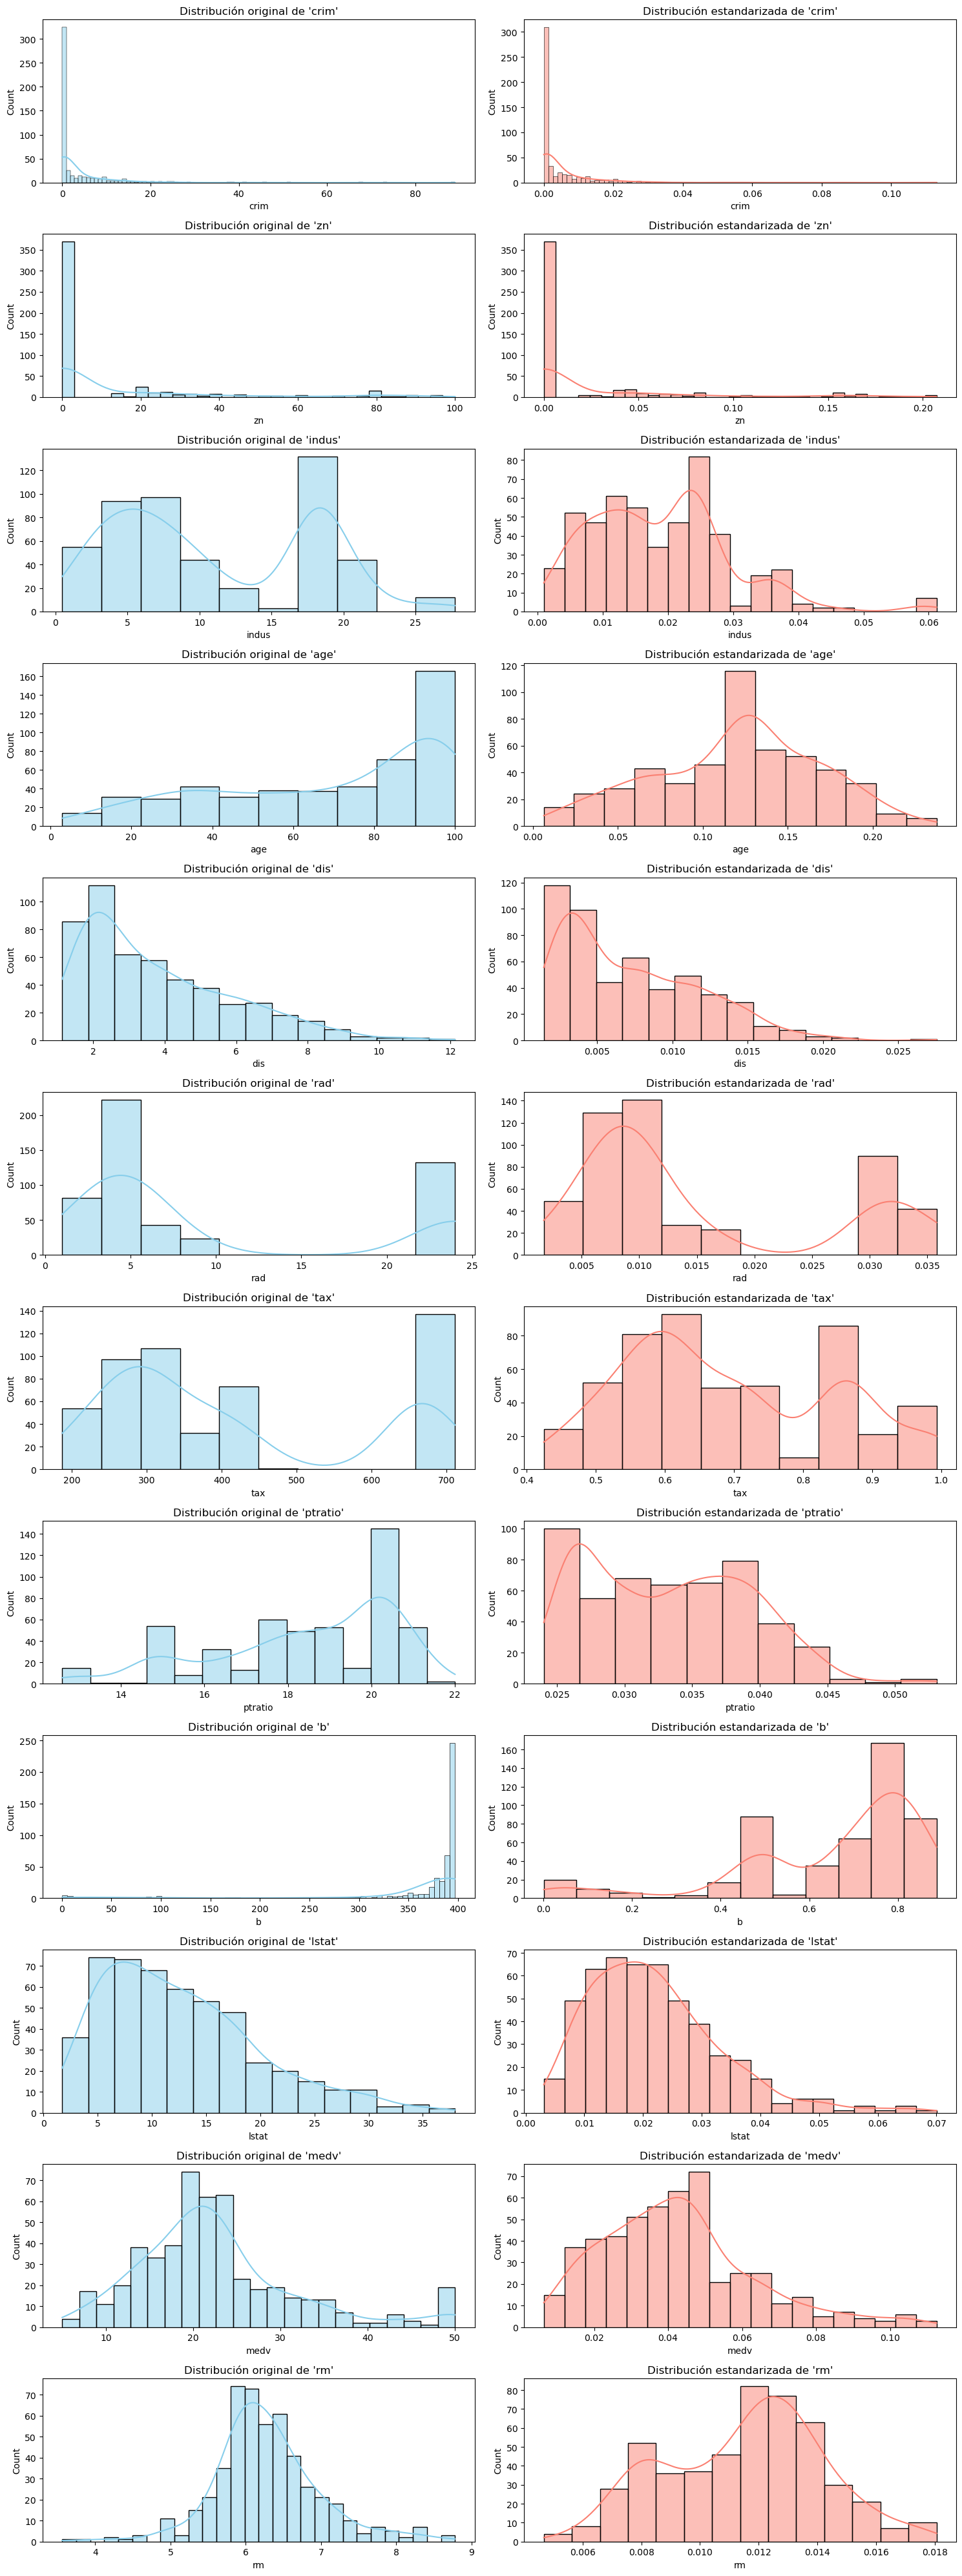

In [36]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
df_vector = df.copy()
df_vector[features] = normalizer.fit_transform(df[features])

# Visualización comparativa: antes y después para todas las características
plt.figure(figsize=(15, 40))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 2, 2*i-1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f"Distribución original de '{feature}'")
    
    plt.subplot(len(features), 2, 2*i)
    sns.histplot(df_vector[feature], kde=True, color='salmon')
    plt.title(f"Distribución estandarizada de '{feature}'")

plt.tight_layout()
plt.show()

## Técnica adicional (Robust Scaling)

### El Robust Scaling es una técnica de escalado que utiliza estadísticos robustos (la mediana y el rango intercuartílico, IQR) en lugar de la media y la desviación estándar
    - Esta técnica es especialmente útil cuando el dataset contiene outliers (valores atípicos), ya que la mediana y el IQR son menos sensibles a valores extremos

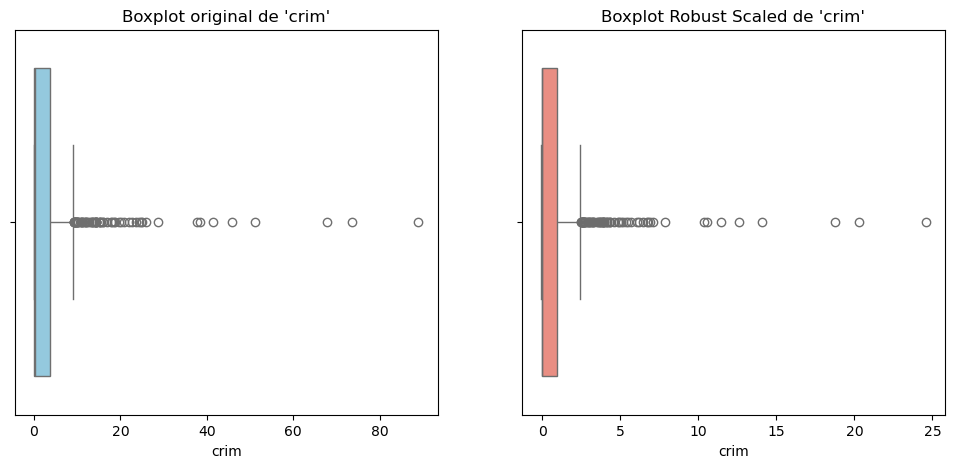

In [37]:
from sklearn.preprocessing import RobustScaler

scaler_robust = RobustScaler()
df_robust = df.copy()
df_robust[features] = scaler_robust.fit_transform(df[features])

# Visualización comparativa para 'crim'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['crim'], color='skyblue')
plt.title("Boxplot original de 'crim'")

plt.subplot(1,2,2)
sns.boxplot(x=df_robust['crim'], color='salmon')
plt.title("Boxplot Robust Scaled de 'crim'")
plt.show()